In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from MuC import plot_tools as pt
from MuC import xsecs

import pandas as pd

from DarkNews import plot_tools as pt

In [3]:
marker_styles = {'NOMAD': '^', 
                 'CTFR': '>', 
                 'CCFR': '<', 
                 'E616': 'v', 
                 'BEBC': 'o', 
                 'NuTeV': 's', 
                 'CDHS': '^', 
                 'FNAL-E0053': '>', 
                 'SERPUKHOV-045': '<',
                 'SERPUKHOV-107': 'v',
                 'IHEP-JINR': 'o', 
                 'CHORUS': 's', 
                 'FASER24': '*', 
}

marker_styles_fill = {'NOMAD': 'lightgrey',
                 'CTFR': 'lightgrey',
                 'CCFR': 'lightgrey',
                 'E616': 'lightgrey',
                 'BEBC': 'lightgrey',
                 'NuTeV': 'lightgrey',
                 'CDHS': 'white',
                 'FNAL-E0053': 'white',
                 'SERPUKHOV-045': 'white',
                 'SERPUKHOV-107': 'white',
                 'IHEP-JINR': 'white',
                 'CHORUS': 'white',
                 'FASER24': 'lightgrey',
                 }

In [4]:

def load_HEPdata_file(exp, nuflavor):
    data = pd.read_csv(f'xsec_database/{exp}_{nuflavor}.csv', skiprows=0, header=10)

    if exp == 'NOMAD':
        x = data['E(P=1) [GEV]']
        xlow = x - data['E(P=1) [GEV] LOW']
        xhigh = data['E(P=1) [GEV] HIGH'] - x

        y =  (data['SIG/E(P=1) [10**-38CM**2/GEV]'])*x*1e-38
        ylow = np.sqrt(data['stat -']**2 + data['sys -']**2)*x*1e-38
        yhigh = np.sqrt(data['stat +']**2 + data['sys +']**2)*x*1e-38

    elif exp == 'CTFR':
        # NOTE: 4% sys included by hand
        y =  data['SIG [CM**2]']
        ylow = np.abs(data['error +'])
        ylow += y*0.04

        yhigh = np.abs(data['error -'])
        yhigh += y*0.04

        
        x = data['E [GEV]']
        xlow = None
        xhigh = None

    elif exp == 'CCFR':
        x = data['E(P=1) [GEV]']
        y =  data['SIG/E/A [PB/GEV]']*1e-36*x # cm^2

        ylow = np.sqrt(data['stat -']**2 + data['sys -']**2)*1e-36*x
        yhigh = np.sqrt(data['stat +']**2 + data['sys +']**2)*1e-36*x
        
        xlow = None
        xhigh = None

    elif exp == 'E616':
        x = data['E [GEV]']
        y =  data['SIG/E [CM**2/GEV]']*x # cm^2

        ylow = np.abs(data['error -']*x)
        yhigh = np.abs(data['error +']*x)
        
        xlow = None
        xhigh = None
    
    elif exp == 'IHEP-JINR':
        
        x = data['E [GEV]']
        y =  data['SIG/E [FB/GEV]']*x*1e-39 # cm^2

        ylow = np.sqrt(data['stat -']**2 + data['sys -']**2)*1e-39*x
        yhigh = np.sqrt(data['stat +']**2 + data['sys +']**2)*1e-39*x
        
        xlow = x - data['E [GEV] LOW']
        xhigh = data['E [GEV] HIGH'] - x
    
    elif exp == 'CDHS':
        x = data['PLAB [GEV]']
        y =  data['SIG/E [10**-38 CM**2/GEV]']*x*1e-38 # cm^2

        ylow = np.sqrt(data['stat -']**2 + data['sys -']**2)*1e-38*x
        yhigh = np.sqrt(data['stat +']**2 + data['sys +']**2)*1e-38*x
        
        xlow = None
        xhigh = None

    elif exp == 'FNAL-E0053':
        x = data['E [GEV]']
        y =  data['SIG/E [CM**2/GEV]']*x # cm^2
        
        ylow = np.abs(data['error -']*x)
        yhigh = np.abs(data['error +']*x)
        
        xlow = None
        xhigh = None	

    elif exp == 'BEBC':
        x = data['PLAB [GEV]']
        y =  data['SIG/E [10**-38 CM**2/GEV]']*x*1e-38 # cm^2

        ylow = np.sqrt(data['stat -']**2 + data['sys -']**2)*1e-38*x
        yhigh = np.sqrt(data['stat +']**2 + data['sys +']**2)*1e-38*x
        
        xlow = x - data['PLAB [GEV] LOW']
        xhigh = data['PLAB [GEV] HIGH'] - x
    
    elif exp == 'SERPUKHOV-045':
        x = data['E [GEV]']
        y =  data['SIG/E [FB/GEV]']*x*1e-39 # cm^2

        ylow = np.abs(data['error +'])*x*1e-39
        ylow += y*0.04
        yhigh = np.abs(data['error -'])*x*1e-39
        yhigh += y*0.04

        xlow = x - data['E [GEV] LOW']
        xhigh = data['E [GEV] HIGH'] - x

    elif exp == 'SERPUKHOV-107':
        x = data['PLAB [GEV]']
        y =  data['SIG/E [10**-38 CM**2/GEV]']*x*1e-38 # cm^2

        ylow = np.abs(data['error +'])*x*1e-38
        yhigh = np.abs(data['error -'])*x*1e-38

        xlow = x - data['PLAB [GEV] LOW']
        xhigh = data['PLAB [GEV] HIGH'] - x

    elif exp == 'NuTeV':
        x = data['PLAB [GEV]']
        y =  data['SIG/E [10**-38 CM**2/GEV]']*x*1e-38 # cm^2

        ylow = np.abs(data['error +']*x*1e-38-y)
        yhigh = np.abs(data['error +']*x*1e-38-y)

        xlow = None
        xhigh = None
    
    elif exp =='FASER24':
        x = data['E [GEV]']
        y =  data['SIG/E [CM**2/GEV]']*x*1e-38 # cm^2

        ylow = np.abs(y - data['error -']*1e-38*x)
        yhigh = np.abs(y - data['error +']*1e-38*x)
        
        xlow = x - data['E [GEV] LOW']
        xhigh = data['E [GEV] HIGH'] - x
    
    return x, xlow, xhigh, y, ylow, yhigh


datapoint_kwargs = {
            "markeredgewidth": 0.5,
            "capsize": 1,
            "markeredgecolor": "grey",
            "ms": 3.5,
            "color": "grey",
            "lw": 0.0,
            "elinewidth": 0.8,
            "alpha": 1,
            "zorder": 0.9}

def plot_data(ax, exp, nuflavor):

    x, xlow, xhigh, y, ylow, yhigh = load_HEPdata_file(exp, nuflavor)
    x = np.array(x)
   
    label = exp if 'bar' not in nuflavor else None
    if exp == 'FASER24':
        label='FASER (2024)'
    
    if x[-1] > 50:
        if xlow is not None:
            c = ax.errorbar(x, y/x*units, yerr=[ylow/x*units,yhigh/x*units], xerr=[xlow, xhigh], marker=marker_styles[exp], markerfacecolor = marker_styles_fill[exp], label=label, **datapoint_kwargs)
        else:
            c = ax.errorbar(x, y/x*units, yerr=[ylow/x*units,yhigh/x*units], marker=marker_styles[exp], markerfacecolor = marker_styles_fill[exp], label=label, **datapoint_kwargs)
        return c
    else:
        return None

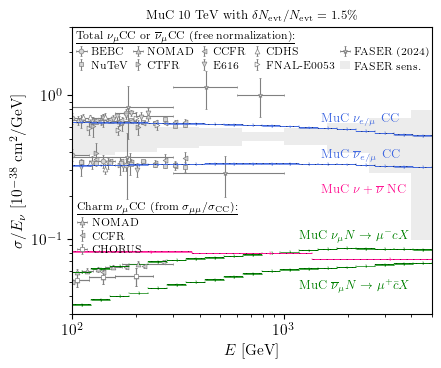

In [8]:
fig, ax = pt.std_fig()
ENUMIN = 100 # GeV
units = 1e38 # cm^2/GeV

labels=[]
labels.append(plot_data(ax, 'BEBC', 'numu'))
labels.append(plot_data(ax, 'NuTeV', 'numu'))
labels.append(plot_data(ax, 'NOMAD', 'numu'))
labels.append(plot_data(ax, 'CTFR', 'numu'))
labels.append(plot_data(ax, 'CCFR', 'numu'))
labels.append(plot_data(ax, 'E616', 'numu'))
labels.append(plot_data(ax, 'IHEP-JINR', 'numu'))
labels.append(plot_data(ax, 'CDHS', 'numu'))
labels.append(plot_data(ax, 'FNAL-E0053', 'numu'))
labels.append(plot_data(ax, 'SERPUKHOV-045', 'numu'))
labels.append(plot_data(ax, 'SERPUKHOV-107', 'numu'))
labels.append(plot_data(ax, 'FASER24', 'numu'))

labels = [l for l in labels if l is not None]

plot_data(ax, 'CTFR', 'numubar')
plot_data(ax, 'CCFR', 'numubar')
plot_data(ax, 'E616', 'numubar')
plot_data(ax, 'IHEP-JINR', 'numubar')
plot_data(ax, 'CDHS', 'numubar')
plot_data(ax, 'BEBC', 'numubar')
plot_data(ax, 'SERPUKHOV-045', 'numubar')
plot_data(ax, 'NuTeV', 'numubar')
plot_data(ax, 'FASER24', 'numubar')

MuCdatapoint_kwargs = {
            "markeredgewidth": 0.25,
            "capsize": 1,
            "color": "royalblue",
            "markerfacecolor": "royalblue",
            "markeredgecolor": "royalblue",
            "ms": 0.5,
            "lw": 0.0,
            "elinewidth": 0.5,
            "alpha": 1}

error = 0.015
xbins = np.geomspace(ENUMIN, 5e3, 20, endpoint=True)
x = (xbins[1:]+xbins[:-1])/2
y=(xsecs.sigma_lightquark_CC_nu(x)+0*xsecs.sigma_charm_CC_nu(x))/x*units
ax.errorbar(x, y, yerr=y*error, xerr=[x - xbins[:-1], xbins[1:]-x], marker='o', label='MuC', zorder=1, **MuCdatapoint_kwargs)
ax.bar(x, bottom=(1-0.5*error)*y, height=error*y, width=np.diff(xbins), color='royalblue', hatch='/////', zorder=2)

y=(xsecs.sigma_lightquark_CC_nubar(x)+0*xsecs.sigma_charm_CC_nubar(x))/x*units
ax.errorbar(x, y, yerr=y*error, xerr=[x - xbins[:-1], xbins[1:]-x], marker='o', label='MuC', zorder=1, **MuCdatapoint_kwargs)
ax.bar(x, bottom=(1-0.5*error)*y, height=error*y, width=np.diff(xbins), color='royalblue', hatch='/////', zorder=2)


MuCdatapoint_kwargs['color'] = 'green'
MuCdatapoint_kwargs['markerfacecolor'] = 'green'
MuCdatapoint_kwargs['markeredgecolor'] = 'green'
y=(xsecs.sigma_charm_CC_nu(x))/x*units
# ax.bar(x, bottom=(1-error)*y, height=2*error*y, width=np.diff(xbins), color='green', hatch='/////')
ax.errorbar(x, y, yerr=y*error, xerr=[x - xbins[:-1], xbins[1:]-x], marker='o', label='MuC', zorder=1, **MuCdatapoint_kwargs)
ax.bar(x, bottom=(1-0.5*error)*y, height=error*y, width=np.diff(xbins), color='green', hatch='/////', zorder=2)
y=(xsecs.sigma_charm_CC_nubar(x))/x*units
# ax.bar(x, bottom=(1-error)*y, height=2*error*y, width=np.diff(xbins), color='green', hatch='\\\\\\\\\\')
ax.errorbar(x, y, yerr=y*error, xerr=[x - xbins[:-1], xbins[1:]-x], marker='o', label='MuC', zorder=1, **MuCdatapoint_kwargs)
ax.bar(x, bottom=(1-0.5*error)*y, height=error*y, width=np.diff(xbins), color='green', hatch='/////', zorder=2)

xbins = np.geomspace(ENUMIN, 5e3, 4, endpoint=True)
x = (xbins[1:]+xbins[:-1])/2
y=(xsecs.sigma_NC_nu(x)+xsecs.sigma_NC_nubar(x))/x/2*units
MuCdatapoint_kwargs['color'] = 'deeppink'
MuCdatapoint_kwargs['markerfacecolor'] = 'deeppink'
MuCdatapoint_kwargs['markeredgecolor'] = 'deeppink'
# ax.bar(x, bottom=(1-error)*y, height=2*error*y, width=np.diff(xbins), color='deeppink')
ax.errorbar(x, y, yerr=y*error, xerr=[x - xbins[:-1], xbins[1:]-x], marker='o', label='MuC', zorder=1, **MuCdatapoint_kwargs)
ax.bar(x, bottom=(1-0.5*error)*y, height=error*y, width=np.diff(xbins), color='deeppink', hatch='/////', zorder=2)

def DtoMu_BR(Enu):
    a = 0.097
    b = 6.7 # GeV
    return a/(1 + b/Enu)

bins= np.array([1.03485839e+1,2.99564270e+1,5.00000000e+1,7.03340595e+1,9.00871460e+1,1.19862019e+2,1.59949165e+2,2.39832970e+2])
x = (bins[1:]+bins[:-1])/2
_, y, sigma_high, sigma_low = np.genfromtxt("xsec_database/CHORUS_dimuon_numu.dat", unpack=True)
y *= (xsecs.sigma_lightquark_CC_nu(x)+xsecs.sigma_charm_CC_nu(x))*units/x/DtoMu_BR(x)
sigma_high *= (xsecs.sigma_lightquark_CC_nu(x)+xsecs.sigma_charm_CC_nu(x))*units/x/DtoMu_BR(x)
sigma_low *= (xsecs.sigma_lightquark_CC_nu(x)+xsecs.sigma_charm_CC_nu(x))*units/x/DtoMu_BR(x)
plt.errorbar(x, y, yerr=[y-sigma_low, sigma_high-y], xerr=[x-bins[:-1], bins[1:]-x], marker='^', **datapoint_kwargs)


dimuon_labels=[]

bl, br, x, y, ratio_stat, ratio_sys, _, _ = np.genfromtxt("xsec_database/NOMAD_dimuon_numu.dat", unpack=True)
y *= 1e-3 * (xsecs.sigma_lightquark_CC_nu(x)+xsecs.sigma_charm_CC_nu(x))*units/x/DtoMu_BR(x)
ratio_stat *= 1e-3 * (xsecs.sigma_lightquark_CC_nu(x)+xsecs.sigma_charm_CC_nu(x))*units/x/DtoMu_BR(x)
ratio_sys *= 1e-3 * (xsecs.sigma_lightquark_CC_nu(x)+xsecs.sigma_charm_CC_nu(x))*units/x/DtoMu_BR(x)
dy = np.sqrt(ratio_stat**2 + ratio_sys**2)
c = ax.errorbar(x, y, yerr=dy, xerr=[x-bl, br-x], marker=marker_styles['NOMAD'], markerfacecolor=marker_styles_fill['NOMAD'], label='NOMAD', **datapoint_kwargs)
dimuon_labels.append(c)

x, y, ypdy = np.genfromtxt("xsec_database/CCFR_dimuon_numu.dat", unpack=True)
y *= (xsecs.sigma_lightquark_CC_nu(x)+xsecs.sigma_charm_CC_nu(x))*units/x/DtoMu_BR(x)
ypdy *= (xsecs.sigma_lightquark_CC_nu(x)+xsecs.sigma_charm_CC_nu(x))*units/x/DtoMu_BR(x)
dy = ypdy - y
c = ax.errorbar(x, y, yerr=dy, marker=marker_styles['CCFR'], markerfacecolor=marker_styles_fill['CCFR'], label='CCFR', **datapoint_kwargs)
dimuon_labels.append(c)

bins= np.array([1.03485839e+1,2.99564270e+1,5.00000000e+1,7.03340595e+1,9.00871460e+1,1.19862019e+2,1.59949165e+2,2.39832970e+2])
x = (bins[1:]+bins[:-1])/2
_, y, sigma_high, sigma_low = np.genfromtxt("xsec_database/CHORUS_dimuon_numu.dat", unpack=True)
y *= (xsecs.sigma_lightquark_CC_nu(x)+xsecs.sigma_charm_CC_nu(x))*units/x/DtoMu_BR(x)
sigma_high *= (xsecs.sigma_lightquark_CC_nu(x)+xsecs.sigma_charm_CC_nu(x))*units/x/DtoMu_BR(x)
sigma_low *= (xsecs.sigma_lightquark_CC_nu(x)+xsecs.sigma_charm_CC_nu(x))*units/x/DtoMu_BR(x)
c = ax.errorbar(x, y, yerr=[y-sigma_low, sigma_high-y], xerr=[x-bins[:-1], bins[1:]-x], marker=marker_styles['CHORUS'], markerfacecolor=marker_styles_fill['CHORUS'], label='CHORUS', **datapoint_kwargs)
dimuon_labels.append(c)


# FASERnu
xbins = np.logspace(np.log10(1e2), np.log10(6.34e3), 10, endpoint=True)
x = (xbins[1:]+xbins[:-1])/2

# _, y, sigma_high, sigma_low = np.genfromtxt("xsec_database/FASER_nue.dat", unpack=True)
# ylow = sigma_low*1e-38*units
# yhigh = sigma_high*1e-38*units
# y *= 1e-38*units
# ax.bar(x, bottom=ylow, height=yhigh-ylow, width=np.diff(xbins), label=r'FASER $\nu_\mu$', alpha=0.2, edgecolor='black', linewidth=0.1, facecolor='grey')

_, y, sigma_high, sigma_low = np.genfromtxt("xsec_database/FASER_numu.dat", unpack=True)
ylow = sigma_low*1e-38*units
yhigh = sigma_high*1e-38*units
y *= 1e-38*units
lsens=ax.bar(x, bottom=ylow, height=(yhigh-ylow), width=np.diff(xbins), label=r'FASER sens.', alpha=0.15, edgecolor='black', linewidth=0.0, facecolor='grey')
labels.append(lsens)

ax.annotate(r"MuC ${\nu}_{e/\mu}$ CC", (3*500, 0.66), xycoords='data', fontsize=9, color='royalblue')
ax.annotate(r"MuC $\overline{\nu}_{e/\mu}$ CC", (3*500, 0.37), xycoords='data', fontsize=9, color='royalblue')
ax.annotate(r"MuC $\nu+\overline{\nu}$ NC", (3*500, 0.21), xycoords='data', fontsize=9, color='deeppink')
ax.annotate(r"MuC $\nu_\mu N \to \mu^- c X$", (1.18e3, 0.1), xycoords='data', fontsize=9, color='green')
ax.annotate(r"MuC $\overline{\nu}_\mu N \to \mu^+ \bar c X$", (1.18e3, 0.045), xycoords='data', fontsize=9, color='green')

# ax.annotate(r"\noindent Data: NuTeV/CCFR/CTFR/NOMAD\\CDHS/BEBC/IHEP-JINR", (55, 1.2), xycoords='data', fontsize=8, color='grey')
# ax.annotate(r"\noindent Data: \\CCFR\\NOMAD\\CHORUS", (60, 0.15), xycoords='data', fontsize=8, color='grey')
# ax.annotate(r"\noindent FASER$\nu$ \\ sensitivity", (2.52e3, 1.2), xycoords='data', fontsize=8, color='grey')

ax.set_title(fr"MuC 10 TeV with $\delta N_{{\rm evt}}/N_{{\rm evt}} = {error*100:g}\%$", fontsize=9)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.03, 3)
ax.set_xlim(ENUMIN, 5e3)
ax.set_ylabel(r"$\sigma/E_{\nu}$ [$10^{-38}$ cm$^2$/GeV]")
# ax.set_ylabel(r"$\sigma/E_{\overset{\footnotesize (-)}{\nu}}$ [$10^{-38}$ cm$^2$/GeV]")
ax.set_xlabel(r"$E$ [GeV]")

l1 = ax.legend(title=r'\underline{Total $\nu_\mu$CC or $\overline{\nu}_\mu$CC (free normalization):}', title_fontsize=8, handles=labels, fontsize=7.5, frameon=True, loc=(0.005, 0.84), ncol=5, framealpha=0.0, columnspacing=0.5, labelspacing=0.4, edgecolor='None', handletextpad=0.4, handlelength=1., borderpad=0.2)
l1._legend_box.align = "left"
l2 = ax.legend(title=r'\underline{Charm $\nu_\mu$CC (from $\sigma_{\mu\mu}/\sigma_{\rm CC}$):}', title_fontsize=8, handles=dimuon_labels, fontsize=7.5, frameon=True, loc=(0.0075, 0.2), ncol=1, framealpha=0.0, columnspacing=0.5, labelspacing=0.4, edgecolor='None', handletextpad=0.4, handlelength=1., borderpad=0.2)
l2._legend_box.align = "left"
plt.gca().add_artist(l1)
# plt.gca().add_artist(l2)

fig.savefig("plots/xsecs/xsec_measurement.pdf", bbox_inches='tight')

# Plotting all cross sections we are using together

In [6]:
tex_labels = {}
tex_labels['e'] = r'e'
tex_labels['m'] = r'\mu'
tex_labels['l'] = r'\tau'

leptonic_electron=True
leptonic_trident=True
XLOG = True
experiment = 'imcc'
Emu_dic = {'mutristan':1e3, 'imcc':5e3, 'map':0.750e3}
Emu = Emu_dic[experiment]
if XLOG:
    E = np.geomspace(50, 15e3, 10_000)
    Ebins = np.geomspace(10, 3*Emu, 20, endpoint=True)
else:
    E = np.linspace(50, Emu, 100)
    Ebins = np.linspace(10, 3*Emu, 20, endpoint=True)

# rate, _ = np.histogram(nus_muT['E'], bins = Ebins, weight = nus_muT['w'])
# Rates = {'mutristan': nus_muT['w'], 'imcc': nus_mucol['w'], 'map': nus_mokhov['w']}

In [7]:
nue_xsec_dic = xsecs.get_cross_sections(E, nui='nue', Z=26, A=26)
numu_xsec_dic = xsecs.get_cross_sections(E, nui='numu', Z=26, A=26)
nuebar_xsec_dic = xsecs.get_cross_sections(E, nui='nuebar', Z=26, A=26)
numubar_xsec_dic = xsecs.get_cross_sections(E, nui='numubar', Z=26, A=26)
print(nue_xsec_dic.keys())
print(numu_xsec_dic.keys())
print(nuebar_xsec_dic.keys())
print(numubar_xsec_dic.keys())

dict_keys(['nue_CC_light', 'nue_CC_charm', 'nue_CC_bottom', 'nue_NC', 'nue_QE', 'nue_ES_e', 'nue_invdecay_mu', 'nue_invdecay_tau', 'nue_pi0_coh', 'nue_resonant_rho-', 'nue_resonant_Kstar-', 'nue_eee_tri', 'nue_eem_tri', 'nue_eel_tri', 'nue_eme_tri', 'nue_emm_tri', 'nue_eml_tri', 'nue_ele_tri', 'nue_elm_tri', 'nue_ell_tri', 'nue_mee_tri', 'nue_mem_tri', 'nue_mel_tri', 'nue_mme_tri', 'nue_mmm_tri', 'nue_mml_tri', 'nue_mle_tri', 'nue_mlm_tri', 'nue_mll_tri', 'nue_lee_tri', 'nue_lem_tri', 'nue_lel_tri', 'nue_lme_tri', 'nue_lmm_tri', 'nue_lml_tri', 'nue_lle_tri', 'nue_llm_tri', 'nue_lll_tri', 'nue_total'])
dict_keys(['numu_CC_light', 'numu_CC_charm', 'numu_CC_bottom', 'numu_NC', 'numu_QE', 'numu_ES_e', 'numu_invdecay_mu', 'numu_invdecay_tau', 'numu_pi0_coh', 'numu_resonant_rho-', 'numu_resonant_Kstar-', 'numu_eee_tri', 'numu_eem_tri', 'numu_eel_tri', 'numu_eme_tri', 'numu_emm_tri', 'numu_eml_tri', 'numu_ele_tri', 'numu_elm_tri', 'numu_ell_tri', 'numu_mee_tri', 'numu_mem_tri', 'numu_mel_tri'

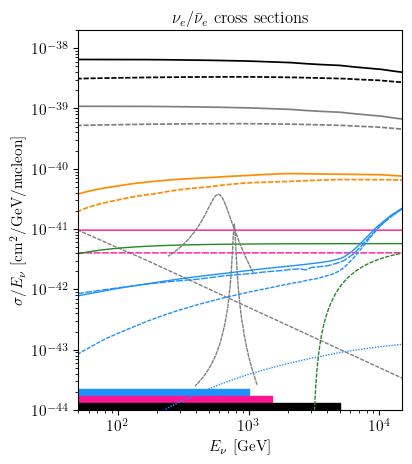

In [161]:
import matplotlib.gridspec as gridspec
from scipy import interpolate

fig, ax = pt.std_fig(figsize=(4.0, 5.))

ax.plot(E, nue_xsec_dic['nue_CC_light']/E, ls='-', label=r'$\nu_e$CC', c='black', lw=1.25)
ax.plot(E, nue_xsec_dic['nue_NC']/E, ls='-', label=r'$\nu$NC', c='grey', lw=1.25)
ax.plot(E, nue_xsec_dic['nue_CC_charm']*DtoMu_BR(E)/E, ls='-', label=r'$\nu_e$CC (charm)', c='darkorange', lw=1.25)

ax.plot(E, nuebar_xsec_dic['nuebar_CC_light']/E, ls=(1,(3,1)), label=r'$\bar\nu_e$CC', c='black', lw=1.25)
ax.plot(E, nuebar_xsec_dic['nuebar_NC']/E, ls=(1,(3,1)), label=r'$\bar\nu$NC', c='grey', lw=1.25)
ax.plot(E, nuebar_xsec_dic['nuebar_CC_charm']*DtoMu_BR(E)/E, ls=(1,(3,1)), label=r'$\bar\nu_e$CC (charm)', c='darkorange', lw=1.25)

ax.plot(E, nue_xsec_dic['nue_pi0_coh']/E, ls=(1,(3,1)), label=r'coh$\pi^0$', c='gray', lw=1)

if leptonic_electron:
    ax.plot(E, nue_xsec_dic['nue_ES_e']/E, ls='-', label=r'$\nu_e - e$', c='deeppink', lw=1)
    ax.plot(E, nuebar_xsec_dic['nuebar_ES_e']/E, ls=(1,(5,1)), label=r'$\bar\nu_e - e$', c='deeppink', lw=1)

    ax.plot(E, nuebar_xsec_dic['nuebar_invdecay_mu']/E, ls=(1,(3,0)), label=r'$\bar\nu_e - e \to \bar\nu_\mu \mu^-$', c='forestgreen', lw=1)
    ax.plot(E, nuebar_xsec_dic['nuebar_invdecay_tau']/E, ls=(1,(3,1)), label=r'$\bar\nu_e - e \to \bar\nu_\tau \tau^-$', c='forestgreen', lw=1)
    
    E_at_max = E[np.argmax(nuebar_xsec_dic['nuebar_resonant_rho-'])]
    mask = (E<E_at_max*1.8) & (E_at_max*0.4 < E)
    ax.plot(E[mask], nuebar_xsec_dic['nuebar_resonant_rho-'][mask]/E[mask], lw=1, ls=(1,(3,0.5)), label=r'$\bar\nu_e - e$', c='grey')
    
    E_at_max = E[np.argmax(nuebar_xsec_dic['nuebar_resonant_Kstar-'])]
    mask = (E<E_at_max*1.5) & (E_at_max*0.5 < E)
    ax.plot(E[mask], nuebar_xsec_dic['nuebar_resonant_Kstar-'][mask]/E[mask], lw=1, ls=(1,(3,0.5)), label=r'$\bar\nu_e - e$', c='grey')

if leptonic_trident:
    ax.plot(E, nue_xsec_dic['nue_mem_tri']/E, ls=(1,(1,0)), label=r'$\nu_e \to \nu_\mu e^+\mu^-$', c='dodgerblue', lw=1)
    ax.plot(E, nue_xsec_dic['nue_eee_tri']/E, ls=(1,(5,1)), label=r'$\nu_e \to \nu_e e^+e^-$', c='dodgerblue', lw=1)
    ax.plot(E, nue_xsec_dic['nue_lel_tri']/E, ls=(1,(3,1)), label=r'$\nu_e \to \nu_\tau \mu^+\tau^-$', c='dodgerblue', lw=1)
    ax.plot(E, nue_xsec_dic['nue_ell_tri']/E, ls=(1,(1,1)), label=r'$\nu_e \to \nu_e \tau^+\tau^-$', c='dodgerblue', lw=1)

    # ax.plot(E, nuebar_xsec_dic['nuebar_eee_tri']/E, ls=(1,(3,1)), label=r'$\bar\nu_e \to \bar\nu_e e^+e^-$', c='lightblue', lw=1)
    # ax.plot(E, nuebar_xsec_dic['nuebar_eme_tri']/E, ls=(1,(3,1)), label=r'$\bar\nu_e \to \bar\nu_\mu e^+\mu^-$', c='dodgerblue', lw=1)
    # ax.plot(E, nuebar_xsec_dic['nuebar_emm_tri']/E, ls=(1,(3,1)), label=r'$\bar\nu_e \to \bar\nu_e \mu^+\mu^-$', c='blue', lw=1)
    # ax.plot(E, nuebar_xsec_dic['nuebar_ell_tri']/E, ls=(1,(3,1)), label=r'$\bar\nu_e \to \bar\nu_e \tau^+\tau^-$', c='green', lw=1)
    # ax.plot(E, nuebar_xsec_dic['nuebar_lel_tri']/E, ls=(1,(3,1)), label=r'$\bar\nu_e \to \bar\nu_\tau \mu^+\tau^-$', c='green', lw=1)


ax.set_xlim(E.min(), E.max())
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$\sigma/E_\nu$ [cm$^2$/GeV/nucleon]')
ax.set_xlabel(r'$E_{\nu}$ [GeV]')
ax.set_title(r'$\nu_e/\bar\nu_e$ cross sections')
# ax.legend(loc='lower right', ncol=2, frameon=True, fontsize=8.5, framealpha=0.9, edgecolor='None')

ax.fill_between([0,1e3], 2*[0], 2*[2.2e-44], color='dodgerblue', alpha=1)  
ax.fill_between([0,1.5e3], 2*[0], 2*[1.7e-44], color='deeppink', alpha=1)  
ax.fill_between([0,5e3], 2*[0], 2*[1.3e-44], color='black', alpha=1)  
ax.set_ylim(1e-44, 2e-38)

fig.savefig('plots/xsecs/cross_sections_all_e.pdf', bbox_inches='tight')

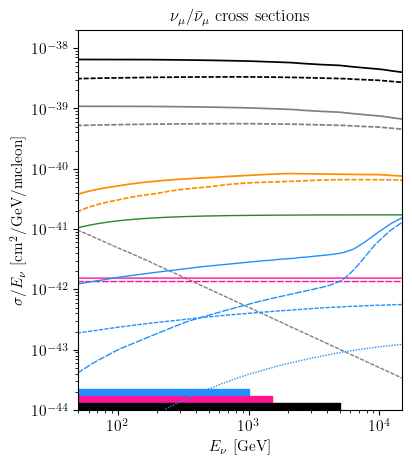

In [162]:
import matplotlib.gridspec as gridspec
from scipy import interpolate

fig, ax = pt.std_fig(figsize=(4.0, 5.))

ax.plot(E, numu_xsec_dic['numu_CC_light']/E, ls='-', label=r'$\nu_\mu$CC', c='black', lw=1.25)
ax.plot(E, numu_xsec_dic['numu_NC']/E, ls='-', label=r'$\nu$NC', c='grey', lw=1.25)
ax.plot(E, numu_xsec_dic['numu_CC_charm']*DtoMu_BR(E)/E, ls='-', label=r'$\nu_\mu$CC (charm)', c='darkorange', lw=1.25)
ax.plot(E, numubar_xsec_dic['numubar_CC_light']/E, ls=(1,(3,1)), label=r'$\bar\nu_\mu$CC', c='black', lw=1.25)
ax.plot(E, numubar_xsec_dic['numubar_NC']/E, ls=(1,(3,1)), label=r'$\bar\nu$NC', c='grey', lw=1.25)
ax.plot(E, numubar_xsec_dic['numubar_CC_charm']*DtoMu_BR(E)/E, ls=(1,(3,1)), label=r'$\bar\nu_\mu$CC (charm)', c='darkorange', lw=1.25)


ax.plot(E, numu_xsec_dic['numu_pi0_coh']/E, ls=(1,(3,1)), label=r'coh$\pi^0$', c='gray', lw=1)

if leptonic_electron:
    ax.plot(E, numu_xsec_dic['numu_ES_e']/E, ls='-', label=r'$\nu_\mu \, e$ (ES)', c='deeppink', lw=1)
    ax.plot(E, numubar_xsec_dic['numubar_ES_e']/E, ls=(1,(5,1)), label=r'$\bar\nu_\mu \, e$ (ES)', c='deeppink', lw=1)

    ax.plot(E, numu_xsec_dic['numu_invdecay_mu']/E, ls=(1,(1,0)), label=r'$\nu_\mu e \to \nu_e \mu^-$', c='forestgreen', lw=1)
    
if leptonic_trident:
    ax.plot(E, numu_xsec_dic['numu_eme_tri']/E, ls=(1,(5,0)), label=r'$\nu_\mu \to \nu_e e^+\mu^-$', c='dodgerblue', lw=1)
    ax.plot(E, numu_xsec_dic['numu_lml_tri']/E, ls=(1,(5,1)), label=r'$\nu_\mu \to \nu_\tau \tau^+\mu^-$', c='dodgerblue', lw=1)

    ax.plot(E, numu_xsec_dic['numu_mee_tri']/E, ls=(1,(3,1)), label=r'$\nu_\mu \to \nu_\mu e^+e^-$', c='dodgerblue', lw=1)
    ax.plot(E, numu_xsec_dic['numu_mll_tri']/E, ls=(1,(1,1)), label=r'$\nu_\mu \to \nu_\mu \tau^+\tau^-$', c='dodgerblue', lw=1)

    

# ax.legend(loc='upper right', ncol=1, frameon=True, fontsize=8.5, framealpha=0.9, edgecolor='None')
ax.set_xlim(E.min(), E.max())
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$\sigma/E_\nu$ [cm$^2$/GeV/nucleon]')
ax.set_xlabel(r'$E_{\nu}$ [GeV]')
ax.set_title(r'$\nu_\mu/\bar\nu_\mu$ cross sections')
# ax.legend(loc='lower right', ncol=2, frameon=True, fontsize=8.5, framealpha=0.9, edgecolor='None')

ax.fill_between([0,1e3], 2*[0], 2*[2.2e-44], color='dodgerblue', alpha=1)  
ax.fill_between([0,1.5e3], 2*[0], 2*[1.7e-44], color='deeppink', alpha=1)  
ax.fill_between([0,5e3], 2*[0], 2*[1.3e-44], color='black', alpha=1)  
ax.set_ylim(1e-44, 2e-38)

fig.savefig('plots/xsecs/cross_sections_all_mu.pdf', bbox_inches='tight')